<a href="https://colab.research.google.com/github/gustavocoradin/Projeto-transformador/blob/main/DecisionTreeProjetoTransformador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
import time
import psutil
from memory_profiler import memory_usage

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
import time
import psutil
from memory_profiler import memory_usage

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
import time
import psutil
from memory_profiler import memory_usage

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
import time
import psutil
from memory_profiler import memory_usage

In [ ]:
import kagglehub

path = kagglehub.dataset_download("usdot/flight-delays")
print("Path to dataset files:", path)

Path to dataset files: /Users/gustavocoradin/.cache/kagglehub/datasets/usdot/flight-delays/versions/1


In [ ]:
df = pd.read_csv(path + "/flights.csv")
print(f"Dataset carregado com shape: {df.shape}")
print(f"Colunas: {list(df.columns)}")

Dataset carregado com shape: (5819079, 31)
Colunas: ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']


In [ ]:
print("Valores nulos por coluna (%):")
print(df.isna().sum() * 100 / len(df))

delay_reason_cols = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df[delay_reason_cols] = df[delay_reason_cols].fillna(0)

df.drop(['CANCELLATION_REASON', 'FLIGHT_NUMBER', 'CANCELLED'], axis=1, inplace=True, errors='ignore')

df.drop('TAIL_NUMBER', axis=1, inplace=True)

df.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'AIRLINE'], axis=1, inplace=True, errors='ignore')

df = df.dropna(subset=['DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

print(f"\nShape após limpeza: {df.shape}")
print("\nValores nulos restantes (%):")
print(df.isna().sum() * 100 / len(df))

Valores nulos por coluna (%):
YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT

In [ ]:
df['DELAYED'] = df['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 15 else 0)

delay = df[df['DELAYED'] == 1]
on_time = df[df['DELAYED'] == 0]

delay_count = delay.shape[0]
on_time_count = on_time.shape[0]
total = delay_count + on_time_count
delay_percentage = (delay_count / total) * 100
on_time_percentage = (on_time_count / total) * 100

print(f"Não atrasados: {on_time_count:,}".replace(",", "."))
print(f"Atrasados: {delay_count:,}".replace(",", "."))
print(f"Percentual de voos não atrasados: {on_time_percentage:.2f}%")
print(f"Percentual de voos atrasados: {delay_percentage:.2f}%")

Não atrasados: 4.690.510
Atrasados: 1.023.498
Percentual de voos não atrasados: 82.09%
Percentual de voos atrasados: 17.91%


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(columns=['DELAYED'])
y = df['DELAYED']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

df_undersampled = pd.concat([X_resampled, y_resampled], axis=1)

# Verificando nova distribuição
on_time_count = (df_undersampled['DELAYED'] == 0).sum()
delay_count = (df_undersampled['DELAYED'] == 1).sum()
total = on_time_count + delay_count
on_time_percentage = (on_time_count / total) * 100
delay_percentage = (delay_count / total) * 100

print(f"\nApós undersampling:")
print(f"Não atrasados: {on_time_count:,}".replace(",", "."))
print(f"Atrasados: {delay_count:,}".replace(",", "."))
print(f"Percentual de voos não atrasados: {on_time_percentage:.2f}%")
print(f"Percentual de voos atrasados: {delay_percentage:.2f}%")
print(f"Shape do dataset balanceado: {df_undersampled.shape}")


Após undersampling:
Não atrasados: 1.023.498
Atrasados: 1.023.498
Percentual de voos não atrasados: 50.00%
Percentual de voos atrasados: 50.00%
Shape do dataset balanceado: (2046996, 25)


## Amostragem dos Dados

Mantendo consistência com o KNN: 100k amostras (50k de cada classe) para comparação justa.

In [ ]:

df_delayed = df_undersampled[df_undersampled['DELAYED'] == 1]
df_on_time = df_undersampled[df_undersampled['DELAYED'] == 0]

sample_size_per_class = 1000000

df_delayed_sample = df_delayed.sample(n=sample_size_per_class, random_state=42)
df_on_time_sample = df_on_time.sample(n=sample_size_per_class, random_state=42)

df_sample = pd.concat([df_delayed_sample, df_on_time_sample])

# Embaralhar o DataFrame resultante para misturar as classes
df_sample = df_sample.sample(frac=1, random_state=42).reset_index(drop=True)

print("Shape do DataFrame original:", df_undersampled.shape)
print("Shape do DataFrame amostrado:", df_sample.shape)
print("\nDistribuição da classe 'DELAYED' no DataFrame amostrado:")
print(df_sample['DELAYED'].value_counts())

Shape do DataFrame original: (2046996, 25)
Shape do DataFrame amostrado: (2000000, 25)

Distribuição da classe 'DELAYED' no DataFrame amostrado:
DELAYED
0    1000000
1    1000000
Name: count, dtype: int64


In [ ]:
X_sample = df_sample.drop(columns=['DELAYED'])
y_sample = df_sample['DELAYED']

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample,
    test_size=0.3,
    stratify=y_sample,
    random_state=42
)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")
print(f"Distribuição no treino: {y_train.value_counts().to_dict()}")
print(f"Distribuição no teste: {y_test.value_counts().to_dict()}")

Tamanho do conjunto de treino: 1400000
Tamanho do conjunto de teste: 600000
Distribuição no treino: {1: 700000, 0: 700000}
Distribuição no teste: {0: 300000, 1: 300000}


In [ ]:
dt = DecisionTreeClassifier(
    max_depth=10,
    criterion='gini',
    random_state=42
)

start_time_train = time.time()
dt.fit(X_train, y_train)
end_time_train = time.time()

training_time = end_time_train - start_time_train
print(f"Tempo de Treinamento: {training_time:.4f} segundos")
print(f"Modelo treinado com max_depth={dt.max_depth} e criterion='{dt.criterion}'")

Tempo de Treinamento: 1.4277 segundos
Modelo treinado com max_depth=10 e criterion='gini'


In [ ]:
start_time_pred = time.time()
y_pred = dt.predict(X_test)
end_time_pred = time.time()

prediction_time = end_time_pred - start_time_pred
print(f"Tempo de Predição: {prediction_time:.4f} segundos")
print(f"Predições realizadas para {len(X_test)} amostras")

Tempo de Predição: 0.0954 segundos
Predições realizadas para 600000 amostras


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

tpr = recall  # mesmo que tp / (tp + fn)
tnr = tn / (tn + fp)

cm = confusion_matrix(y_test, y_pred)

print("=== MÉTRICAS NO CONJUNTO DE TESTE ===")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall (TPR): {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print("\nMatriz de Confusão:")
print(cm)

=== MÉTRICAS NO CONJUNTO DE TESTE ===
Acurácia: 1.0000
Precisão: 1.0000
Recall (TPR): 1.0000
F1-score: 1.0000
True Negative Rate (TNR): 1.0000

Matriz de Confusão:
[[300000      0]
 [     0 300000]]


In [ ]:
y_train_pred = dt.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
tpr_train = recall_train
tnr_train = tn / (tn + fp)

print("=== MÉTRICAS NO CONJUNTO DE TREINO ===")
print(f"Acurácia: {accuracy_train:.4f}")
print(f"Precisão: {precision_train:.4f}")
print(f"Recall (TPR): {recall_train:.4f}")
print(f"F1-score: {f1_train:.4f}")
print(f"True Negative Rate (TNR): {tnr_train:.4f}")

print("\n=== COMPARAÇÃO TREINO vs TESTE ===")
print(f"Diferença de Acurácia: {accuracy_train - accuracy:.4f}")
print(f"Diferença de F1-score: {f1_train - f1:.4f}")

acc_diff = accuracy_train - accuracy
if acc_diff > 0.05:
    print(f"\n⚠️  POSSÍVEL OVERFITTING DETECTADO!")
    print(f"Diferença de acurácia treino-teste: {acc_diff:.4f}")
else:
    print(f"\n✅ Modelo parece estar generalizando bem.")
    print(f"Diferença de acurácia treino-teste: {acc_diff:.4f}")

=== MÉTRICAS NO CONJUNTO DE TREINO ===
Acurácia: 1.0000
Precisão: 1.0000
Recall (TPR): 1.0000
F1-score: 1.0000
True Negative Rate (TNR): 1.0000

=== COMPARAÇÃO TREINO vs TESTE ===
Diferença de Acurácia: 0.0000
Diferença de F1-score: 0.0000

✅ Modelo parece estar generalizando bem.
Diferença de acurácia treino-teste: 0.0000


In [ ]:
print("\n" + "="*50)
print("VALIDAÇÃO CRUZADA 5-FOLDS - DECISION TREE")
print("="*50)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

dt_cv = DecisionTreeClassifier(max_depth=10, criterion='gini', random_state=42)
cv_results = cross_validate(dt_cv, X_sample, y_sample, cv=cv, scoring=scoring, return_train_score=True)

print(f"Acurácia - Treino: {cv_results['train_accuracy'].mean():.4f} ± {cv_results['train_accuracy'].std():.4f}")
print(f"Acurácia - Validação: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"Precisão - Treino: {cv_results['train_precision'].mean():.4f} ± {cv_results['train_precision'].std():.4f}")
print(f"Precisão - Validação: {cv_results['test_precision'].mean():.4f} ± {cv_results['test_precision'].std():.4f}")
print(f"Recall - Treino: {cv_results['train_recall'].mean():.4f} ± {cv_results['train_recall'].std():.4f}")
print(f"Recall - Validação: {cv_results['test_recall'].mean():.4f} ± {cv_results['test_recall'].std():.4f}")
print(f"F1-score - Treino: {cv_results['train_f1'].mean():.4f} ± {cv_results['train_f1'].std():.4f}")
print(f"F1-score - Validação: {cv_results['test_f1'].mean():.4f} ± {cv_results['test_f1'].std():.4f}")

cv_acc_diff = cv_results['train_accuracy'].mean() - cv_results['test_accuracy'].mean()
if cv_acc_diff > 0.05:
    print(f"\n⚠️  POSSÍVEL OVERFITTING DETECTADO NA VALIDAÇÃO CRUZADA!")
    print(f"Diferença de acurácia treino-validação: {cv_acc_diff:.4f}")
else:
    print(f"\n✅ Modelo generalizando bem na validação cruzada.")
    print(f"Diferença de acurácia treino-validação: {cv_acc_diff:.4f}")


VALIDAÇÃO CRUZADA 5-FOLDS - DECISION TREE
Acurácia - Treino: 1.0000 ± 0.0000
Acurácia - Validação: 1.0000 ± 0.0000
Precisão - Treino: 1.0000 ± 0.0000
Precisão - Validação: 1.0000 ± 0.0000
Recall - Treino: 1.0000 ± 0.0000
Recall - Validação: 1.0000 ± 0.0000
F1-score - Treino: 1.0000 ± 0.0000
F1-score - Validação: 1.0000 ± 0.0000

✅ Modelo generalizando bem na validação cruzada.
Diferença de acurácia treino-validação: 0.0000


## Análise de Desempenho Computacional

Medir e analisar o desempenho computacional do Decision Tree incluindo tempo, memória e throughput.

In [ ]:
process = psutil.Process()

dt_perf = DecisionTreeClassifier(max_depth=10, criterion='gini', random_state=42)

def train_dt_model():
    dt_perf.fit(X_train, y_train)

start_time_train = time.time()
mem_usage_train = memory_usage(train_dt_model)
end_time_train = time.time()
training_time = end_time_train - start_time_train
train_ips = len(X_train) / training_time

def predict_dt_model():
    global y_pred_perf
    y_pred_perf = dt_perf.predict(X_test)

cpu_percent_before = process.cpu_percent(interval=None)
start_time_pred = time.time()
mem_usage_pred = memory_usage(predict_dt_model)
end_time_pred = time.time()
cpu_percent_after = process.cpu_percent(interval=None)

prediction_time = end_time_pred - start_time_pred
pred_ips = len(X_test) / prediction_time

print("\n" + "="*50)
print("ANÁLISE DE DESEMPENHO COMPUTACIONAL - DECISION TREE")
print("="*50)
print(f"🕒 Tempo de Treinamento: {training_time:.4f} s")
print(f"🕒 Tempo de Predição: {prediction_time:.4f} s")
print(f"📈 Memória (Treinamento): {max(mem_usage_train):.2f} MB")
print(f"📈 Memória (Predição): {max(mem_usage_pred):.2f} MB")
print(f"⚙️ CPU usada na predição: {cpu_percent_after:.2f}%")
print(f"📊 Instâncias por segundo (treinamento): {train_ips:.2f}")
print(f"📊 Instâncias por segundo (predição): {pred_ips:.2f}")

daily_predictions = 24 * 60 * 60 * pred_ips
print(f"\n📈 THROUGHPUT PARA CENÁRIOS REAIS:")
print(f"Predições por segundo: {pred_ips:.0f}")
print(f"Predições por minuto: {pred_ips * 60:.0f}")
print(f"Predições por hora: {pred_ips * 3600:.0f}")
print(f"Predições por dia: {daily_predictions:.0f}")


ANÁLISE DE DESEMPENHO COMPUTACIONAL - DECISION TREE
🕒 Tempo de Treinamento: 3.2748 s
🕒 Tempo de Predição: 0.5947 s
📈 Memória (Treinamento): 709.50 MB
📈 Memória (Predição): 642.42 MB
⚙️ CPU usada na predição: 23.80%
📊 Instâncias por segundo (treinamento): 427509.60
📊 Instâncias por segundo (predição): 1008964.88

📈 THROUGHPUT PARA CENÁRIOS REAIS:
Predições por segundo: 1008965
Predições por minuto: 60537893
Predições por hora: 3632273567
Predições por dia: 87174565600



IMPORTÂNCIA DAS FEATURES - DECISION TREE
                feature  importance
17        ARRIVAL_DELAY         1.0
0                  YEAR         0.0
1                 MONTH         0.0
22  LATE_AIRCRAFT_DELAY         0.0
21        AIRLINE_DELAY         0.0
20       SECURITY_DELAY         0.0
19     AIR_SYSTEM_DELAY         0.0
18             DIVERTED         0.0
16         ARRIVAL_TIME         0.0
15    SCHEDULED_ARRIVAL         0.0


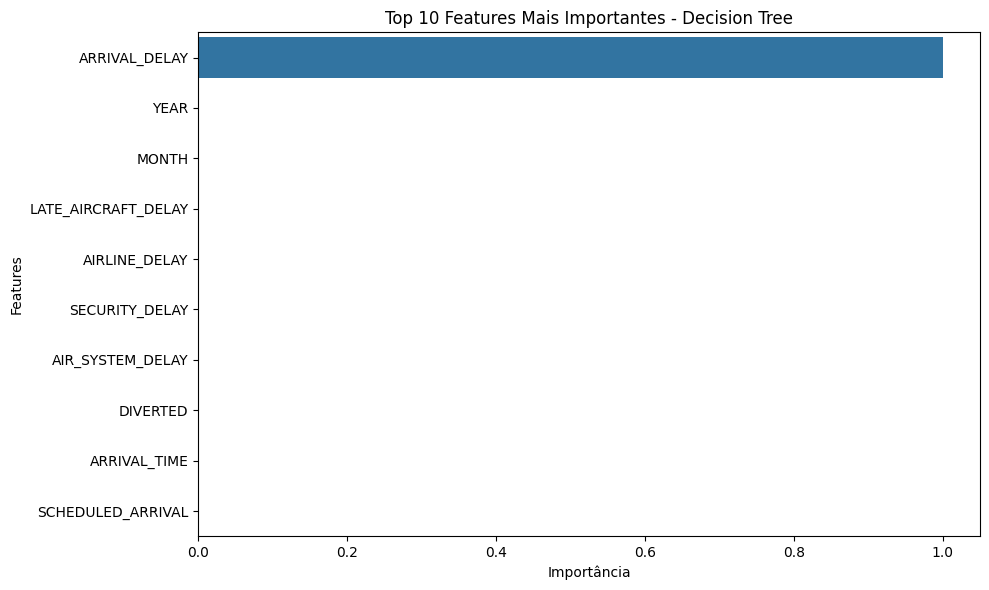

In [ ]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dt.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*50)
print("IMPORTÂNCIA DAS FEATURES - DECISION TREE")
print("="*50)
print(feature_importance.head(10))